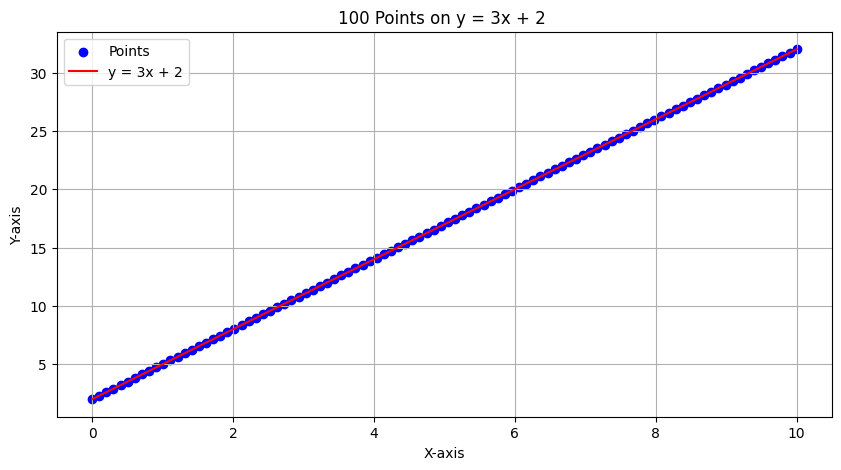

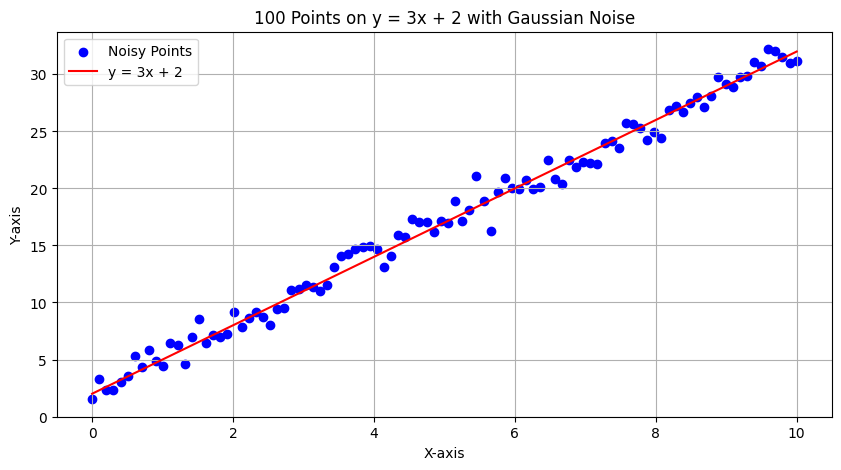

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def create_points_with_noise(start, end, num_points, noise_mean=0, noise_variance=0.8):
    
    x_points = np.linspace(start, end, num_points)
    
    y_points = 3 * x_points + 2

    plt.figure(figsize=(10, 5))
    plt.scatter(x_points, y_points, color="blue", label="Points")
    plt.plot(x_points, y_points, color="red", label="y = 3x + 2")
    plt.title(f"{num_points} Points on y = 3x + 2 ")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()

    noise = np.random.normal(noise_mean, np.sqrt(noise_variance), num_points)
    y_points_noisy = y_points + noise
    
    plt.figure(figsize=(10, 5))
    plt.scatter(x_points, y_points_noisy, color="blue", label="Noisy Points")
    plt.plot(x_points, y_points, color="red", label="y = 3x + 2")
    plt.title(f"{num_points} Points on y = 3x + 2 with Gaussian Noise")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid()
    plt.show()
    
    return x_points, y_points_noisy

x_points, y_points_noisy = create_points_with_noise(0, 10, 100)

In [7]:
def split_data(x_points, y_points, test_size=0.2):
    indices = np.arange(len(x_points))
    np.random.shuffle(indices)
    
    split_index = int(len(x_points) * (1 - test_size))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]
    
    x_train, y_train = x_points[train_indices], y_points[train_indices]
    x_test, y_test = x_points[test_indices], y_points[test_indices]
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(x_points, y_points_noisy)

print("Training set:")
print("X:", x_train)
print("Y:", y_train)

print("\nTest set:")
print("X:", x_test)
print("Y:", y_test)

Training set:
X: [ 8.98989899  0.          3.13131313  8.48484848  2.12121212  4.14141414
  9.19191919  2.32323232  2.62626263  3.93939394  3.83838384  0.50505051
  1.71717172  9.6969697   7.77777778  3.23232323  0.3030303   6.46464646
  4.64646465  5.65656566  2.42424242  2.92929293  4.24242424  8.08080808
  6.56565657  7.27272727  7.17171717  9.39393939  8.18181818  7.97979798
  1.21212121  1.81818182  5.05050505  8.78787879  3.03030303  3.33333333
  4.54545455  2.72727273  4.04040404  7.67676768  1.51515152  7.47474747
  7.87878788  1.91919192  6.66666667  8.88888889  0.60606061  0.2020202
  0.1010101   6.76767677  5.35353535  5.95959596  1.01010101  4.94949495
  6.96969697  0.70707071  8.28282828  4.44444444  0.80808081  9.5959596
 10.          7.57575758  8.68686869  0.90909091  9.09090909  5.75757576
  7.37373737  6.86868687  8.58585859  5.25252525  2.22222222  4.34343434
  3.53535354  9.49494949  9.8989899   2.02020202  2.82828283  3.43434343
  6.06060606  9.7979798 ]
Y: [29.189

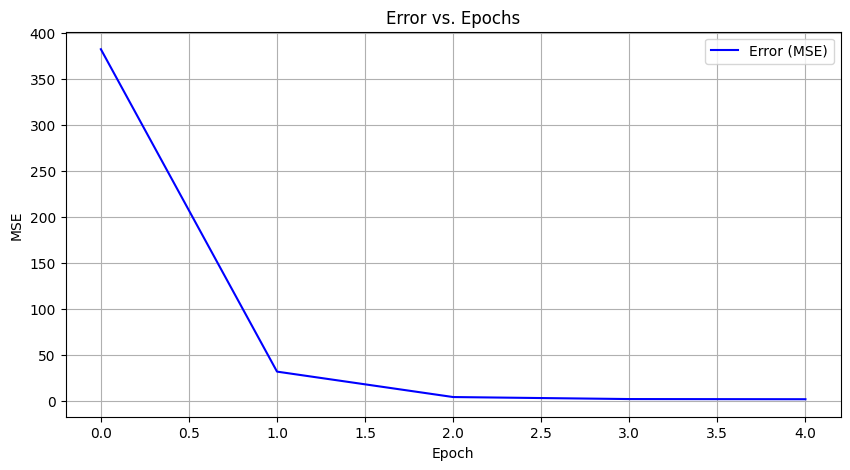


Optimized Parameters:
Slope (m): 3.2077568066431175
Intercept (b): 0.5147371048252286


In [8]:

def gradient_descent_with_plot(x, y, learning_rate=0.01, max_epochs=10, tolerance=1e-6):
    m, b = 0.0, 0.0  
    n = len(y)
    errors = []  

    for epoch in range(max_epochs):
        y_pred = m * x + b
        
        dm = (-2 / n) * np.sum(x * (y - y_pred))
        db = (-2 / n) * np.sum(y - y_pred)       
        
        m -= learning_rate * dm
        b -= learning_rate * db
        
        mse = np.mean((y - y_pred) ** 2)
        errors.append(mse)
        
        if epoch > 0 and abs(errors[-1] - errors[-2]) < tolerance:
            print(f"Converged after {epoch} epochs with MSE: {mse}")
            break

    plt.figure(figsize=(10, 5))
    plt.plot(range(len(errors)), errors, label="Error (MSE)", color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Error vs. Epochs")
    plt.grid()
    plt.legend()
    plt.show()

    return m, b, errors

m_opt, b_opt, errors = gradient_descent_with_plot(x_train, y_train, learning_rate=0.01, max_epochs=5)

print("\nOptimized Parameters:")
print(f"Slope (m): {m_opt}")
print(f"Intercept (b): {b_opt}")

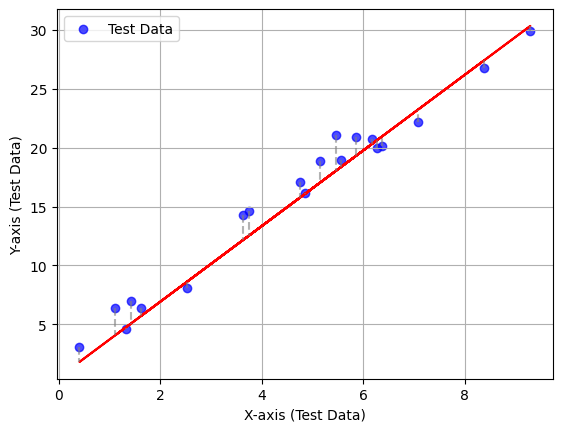

Numeric Errors (y_test - y_pred):
Error at x = 5.56: 0.60
Error at x = 6.26: -0.63
Error at x = 4.85: 0.09
Error at x = 6.36: -0.82
Error at x = 5.15: 1.85
Error at x = 3.64: 2.10
Error at x = 6.16: 0.49
Error at x = 8.38: -0.67
Error at x = 7.07: -0.99
Error at x = 5.45: 3.06
Error at x = 0.40: 1.26
Error at x = 4.75: 1.31
Error at x = 1.62: 0.73
Error at x = 9.29: -0.46
Error at x = 3.74: 2.15
Error at x = 2.53: -0.55
Error at x = 5.86: 1.60
Error at x = 1.11: 2.33
Error at x = 1.31: -0.10
Error at x = 1.41: 1.91


In [9]:
def plot_test_data_with_model_and_errors(m, b, x_test, y_test):
    y_pred = m * x_test + b
    
    errors = y_test - y_pred
    
    plt.scatter(x_test, y_test, color="blue", label="Test Data", alpha=0.7)
    
    plt.plot(x_test, y_pred, color="red")
    
    for i in range(len(x_test)):

        plt.plot([x_test[i], x_test[i]], [y_test[i], y_pred[i]], color="gray", linestyle="--", alpha=0.6)
        

    plt.xlabel("X-axis (Test Data)")
    plt.ylabel("Y-axis (Test Data)")
    plt.legend()
    plt.grid(True)
    
    plt.show()

    print("Numeric Errors (y_test - y_pred):")
    for i in range(len(x_test)):
        print(f"Error at x = {x_test[i]:.2f}: {errors[i]:.2f}")

plot_test_data_with_model_and_errors(m_opt, b_opt, x_test, y_test)